In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [5]:
def trans(df):
    df = df.drop(index=[0,1,2])
    df = df.reset_index(drop=True)
    df = df.transpose()
    df.reset_index(drop=True, inplace=True)
    df = df.drop(index=[0])
    df = df.transpose()
    df.columns = df.iloc[0]
    df = df.drop(index=[0])
    df = df.set_index('年月')
    return df

In [6]:
excel_file = 'CM_Data_TWSE_months.xlsx'
dfs = pd.read_excel(excel_file, sheet_name=None)

In [8]:
# Apply the trans function to each sheet and collect the transformed DataFrames
transformed_dfs = [trans(df) for df in dfs.values()]

# Concatenate all transformed DataFrames into a single DataFrame
df = pd.concat(transformed_dfs, ignore_index=True, axis=1)
df = df.dropna(axis=1)

df

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
年月,,,,,,,,,,,,,,,,,,,,,
202407,104447.482,108351.775,-3904.293,18623865,28512820,-9888955,1.6,449624,382386,4408,...,15995,31.54,6.17,102053,32576,39.34,12.56,92.02,99.17,3.2
202406,102576.351,75854.333,26722.018,20500986,19779159,721827,1.6,303362,275872,8708,...,7078,34.8,3.54,84350,13122,42.15,6.56,108.22,108.45,8.77
202405,102030.869,107464.893,-5434.024,18521358,26130644,-7609286,1.6,370178,367757,5655,...,41905,36.24,17.49,110310,54575,46.03,22.77,101.07,109.39,3.81
202404,67508.78,88343.332,-20834.552,12186818,13046358,-859540,1.54,346143,331703,4338,...,23523,29.53,7.59,114233,37249,36.86,12.02,109.49,141.42,0.5
202403,70809.212,128397.734,-57588.522,19159500,25289082,-6129582,1.53,294357,382431,7089,...,22233,27.32,9.27,80767,24768,33.66,10.32,102.79,128.49,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201412,52491,76663.954,-24172.954,4629970,4835398,-205428,0.65,300464,308024,11009,...,78425,22.17,17.21,154819,98988,33.98,21.73,110.95,120.06,1.31
201411,56406.455,67306.427,-10899.972,5801845,5816247,-14402,0.65,253469,255955,7388,...,89791,21.85,14.09,213184,129439,33.46,20.31,113.15,125.02,2.37
201410,78328.467,65068.203,13260.264,7077735,5553684,1524051,0.63,289078,297667,12615,...,94586,25.97,14.07,264682,167296,39.36,24.88,86.08,114.72,0.09


In [9]:
df[df.columns[-1]] = df[df.columns[-1]].shift(periods = 1)
df.rename(columns={df.columns[-1]: 'shift_ret'}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,shift_ret
年月,,,,,,,,,,,,,,,,,,,,,
202407,104447.482,108351.775,-3904.293,18623865,28512820,-9888955,1.6,449624,382386,4408,...,15995,31.54,6.17,102053,32576,39.34,12.56,92.02,99.17,None
202406,102576.351,75854.333,26722.018,20500986,19779159,721827,1.6,303362,275872,8708,...,7078,34.8,3.54,84350,13122,42.15,6.56,108.22,108.45,3.2
202405,102030.869,107464.893,-5434.024,18521358,26130644,-7609286,1.6,370178,367757,5655,...,41905,36.24,17.49,110310,54575,46.03,22.77,101.07,109.39,8.77
202404,67508.78,88343.332,-20834.552,12186818,13046358,-859540,1.54,346143,331703,4338,...,23523,29.53,7.59,114233,37249,36.86,12.02,109.49,141.42,3.81
202403,70809.212,128397.734,-57588.522,19159500,25289082,-6129582,1.53,294357,382431,7089,...,22233,27.32,9.27,80767,24768,33.66,10.32,102.79,128.49,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201412,52491,76663.954,-24172.954,4629970,4835398,-205428,0.65,300464,308024,11009,...,78425,22.17,17.21,154819,98988,33.98,21.73,110.95,120.06,0.59
201411,56406.455,67306.427,-10899.972,5801845,5816247,-14402,0.65,253469,255955,7388,...,89791,21.85,14.09,213184,129439,33.46,20.31,113.15,125.02,1.31
201410,78328.467,65068.203,13260.264,7077735,5553684,1524051,0.63,289078,297667,12615,...,94586,25.97,14.07,264682,167296,39.36,24.88,86.08,114.72,2.37


In [10]:
df = df.dropna(axis=0)
df['direction'] = np.where(df['shift_ret'] <= -1.5, 1,
                           np.where((df['shift_ret'] > -1.5) & (df['shift_ret'] < 0), -1, 0))
df

C:\Users\joshchiang\AppData\Local\Temp\ipykernel_19124\4286602697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'] = np.where(df['shift_ret'] <= -1.5, 1,


,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,shift_ret,direction
年月,,,,,,,,,,,,,,,,,,,,,
202406,102576.351,75854.333,26722.018,20500986,19779159,721827,1.6,303362,275872,8708,...,34.8,3.54,84350,13122,42.15,6.56,108.22,108.45,3.2,0
202405,102030.869,107464.893,-5434.024,18521358,26130644,-7609286,1.6,370178,367757,5655,...,36.24,17.49,110310,54575,46.03,22.77,101.07,109.39,8.77,0
202404,67508.78,88343.332,-20834.552,12186818,13046358,-859540,1.54,346143,331703,4338,...,29.53,7.59,114233,37249,36.86,12.02,109.49,141.42,3.81,0
202403,70809.212,128397.734,-57588.522,19159500,25289082,-6129582,1.53,294357,382431,7089,...,27.32,9.27,80767,24768,33.66,10.32,102.79,128.49,0.5,0
202402,101564.445,49472.475,52091.97,19867579,14281898,5585681,1.52,296679,250424,4065,...,35.57,19.79,73430,39613,43.44,23.44,105.91,127.09,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201412,52491,76663.954,-24172.954,4629970,4835398,-205428,0.65,300464,308024,11009,...,22.17,17.21,154819,98988,33.98,21.73,110.95,120.06,0.59,0
201411,56406.455,67306.427,-10899.972,5801845,5816247,-14402,0.65,253469,255955,7388,...,21.85,14.09,213184,129439,33.46,20.31,113.15,125.02,1.31,0
201410,78328.467,65068.203,13260.264,7077735,5553684,1524051,0.63,289078,297667,12615,...,25.97,14.07,264682,167296,39.36,24.88,86.08,114.72,2.37,0


In [7]:
# Calculate quantile ranks for each column except 'shift_ret', 'direction'
quantile_columns = df.columns.difference(['shift_ret', 'direction'])
for col in quantile_columns:
    df[str(col) + '_QuantileRank'] = pd.qcut(df[col].fillna(df[col].median()), 5, labels=False, duplicates='drop') + 1
df

C:\Users\maxchiu\AppData\Local\Temp\ipykernel_21576\584297437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(col) + '_QuantileRank'] = pd.qcut(df[col].fillna(df[col].median()), 5, labels=False, duplicates='drop') + 1
C:\Users\maxchiu\AppData\Local\Temp\ipykernel_21576\584297437.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(col) + '_QuantileRank'] = pd.qcut(df[col].fillna(df[col].median()), 5, labels=False, duplicates='drop') + 1
C:\Users\maxchiu\AppData\Local\Temp\ipykernel_21576\58

,0,1,2,3,4,5,6,7,8,9,...,234_QuantileRank,235_QuantileRank,236_QuantileRank,237_QuantileRank,238_QuantileRank,239_QuantileRank,240_QuantileRank,241_QuantileRank,242_QuantileRank,243_QuantileRank
年月,,,,,,,,,,,,,,,,,,,,,
202406,102576.351,75854.333,26722.018,20500986,19779159,721827,1.6,303362,275872,8708,...,2,1,4,1,1,1,3,1,4,2
202405,102030.869,107464.893,-5434.024,18521358,26130644,-7609286,1.6,370178,367757,5655,...,2,3,5,4,2,3,5,4,2,2
202404,67508.78,88343.332,-20834.552,12186818,13046358,-859540,1.54,346143,331703,4338,...,3,2,3,1,2,2,2,1,4,5
202403,70809.212,128397.734,-57588.522,19159500,25289082,-6129582,1.53,294357,382431,7089,...,1,2,2,2,1,1,1,1,2,4
202402,101564.445,49472.475,52091.97,19867579,14281898,5585681,1.52,296679,250424,4065,...,1,2,4,5,1,2,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201412,52491,76663.954,-24172.954,4629970,4835398,-205428,0.65,300464,308024,11009,...,3,5,1,4,4,4,1,4,4,3
201411,56406.455,67306.427,-10899.972,5801845,5816247,-14402,0.65,253469,255955,7388,...,4,5,1,3,5,5,1,4,4,4
201410,78328.467,65068.203,13260.264,7077735,5553684,1524051,0.63,289078,297667,12615,...,5,5,2,3,5,5,3,4,1,3


In [8]:
dfs = df[df['direction'] != -1]
dfs

,0,1,2,3,4,5,6,7,8,9,...,234_QuantileRank,235_QuantileRank,236_QuantileRank,237_QuantileRank,238_QuantileRank,239_QuantileRank,240_QuantileRank,241_QuantileRank,242_QuantileRank,243_QuantileRank
年月,,,,,,,,,,,,,,,,,,,,,
202406,102576.351,75854.333,26722.018,20500986,19779159,721827,1.6,303362,275872,8708,...,2,1,4,1,1,1,3,1,4,2
202405,102030.869,107464.893,-5434.024,18521358,26130644,-7609286,1.6,370178,367757,5655,...,2,3,5,4,2,3,5,4,2,2
202404,67508.78,88343.332,-20834.552,12186818,13046358,-859540,1.54,346143,331703,4338,...,3,2,3,1,2,2,2,1,4,5
202403,70809.212,128397.734,-57588.522,19159500,25289082,-6129582,1.53,294357,382431,7089,...,1,2,2,2,1,1,1,1,2,4
202402,101564.445,49472.475,52091.97,19867579,14281898,5585681,1.52,296679,250424,4065,...,1,2,4,5,1,2,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201412,52491,76663.954,-24172.954,4629970,4835398,-205428,0.65,300464,308024,11009,...,3,5,1,4,4,4,1,4,4,3
201411,56406.455,67306.427,-10899.972,5801845,5816247,-14402,0.65,253469,255955,7388,...,4,5,1,3,5,5,1,4,4,4
201410,78328.467,65068.203,13260.264,7077735,5553684,1524051,0.63,289078,297667,12615,...,5,5,2,3,5,5,3,4,1,3


In [9]:
# Create the table for each column with specified metrics
tables = {}
for col in quantile_columns:
    avg_shift_ret_table = df.groupby(str(col) + '_QuantileRank').agg(
        Avg_shift_ret=('shift_ret', 'mean')
    )
    
    other_metrics_table = dfs.groupby(str(col) + '_QuantileRank').agg(
        Hit_Rate=('shift_ret', lambda x: (x > 0).mean()),
        Good_Rate=('direction', lambda x: (x == 1).mean() / ((x == 1).mean() + (x == 0).mean()))
    )
    
    table = avg_shift_ret_table.join(other_metrics_table)
    
    # table['WOE'] = np.log(table['Good_Rate'] / (1 - table['Good_Rate']))
    # table['IV'] = (table['Good_Rate'] - (1 - table['Good_Rate'])) * table['WOE']
    tables[col] = table
    
for col, table in tables.items():
    print(f"Table for column {col}")
    print(table)
    print()

Table for column 0
               Avg_shift_ret  Hit_Rate  Good_Rate
0_QuantileRank                                   
1                   0.745833  0.714286   0.285714
2                     0.3125  0.608696   0.391304
3                   0.795652  0.761905   0.238095
4                   0.427083  0.727273   0.272727
5                   2.098333  0.772727   0.227273

Table for column 1
               Avg_shift_ret  Hit_Rate  Good_Rate
1_QuantileRank                                   
1                     2.4375  0.750000   0.250000
2                   0.392083  0.666667   0.333333
3                   0.105652  0.750000   0.250000
4                   0.185833  0.714286   0.285714
5                   1.229583  0.695652   0.304348

Table for column 2
               Avg_shift_ret  Hit_Rate  Good_Rate
2_QuantileRank                                   
1                   1.196667  0.809524   0.190476
2                  -0.306667  0.695652   0.304348
3                   0.427391  0.550000   

In [13]:
tables[0]

,Avg_shift_ret,Hit_Rate,Good_Rate
0_QuantileRank,,,
1,0.745833,0.714286,0.285714
2,0.3125,0.608696,0.391304
3,0.795652,0.761905,0.238095
4,0.427083,0.727273,0.272727
5,2.098333,0.772727,0.227273


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Assuming 'tables' is a dictionary of DataFrames
# Example: tables = {0: df1, 1: df2, ..., 200: df201}

# Create a PDF file to save all plots
file_path = '/Users/chiushihchan/Desktop/work/plot/plots.pdf'
with PdfPages(file_path) as pdf:
    for i, table in tables.items():
        plots = pd.DataFrame({
            'Avg_shift_ret': table['Avg_shift_ret'],
            'Hit_Rate': table['Hit_Rate'],
            'Good_Rate': table['Good_Rate']
        }, index=table.index)
        
        # Plotting
        ax = plots.plot(grid=True, figsize=(12, 6))
        ax.set_title(f'Table {i}')
        
        # Save the current plot to the PDF
        pdf.savefig(ax.figure)
        plt.close(ax.figure)


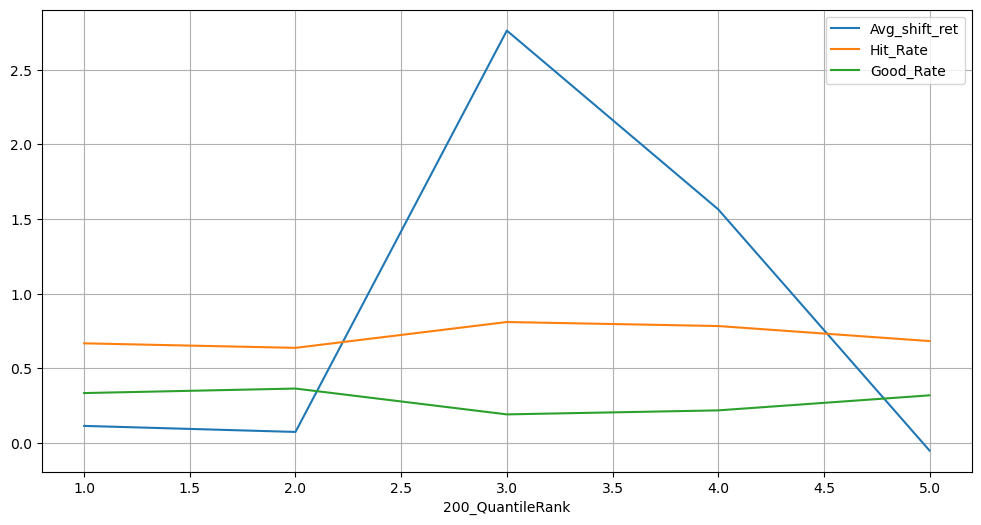

In [32]:
plots = pd.DataFrame({'Avg_shift_ret': tables[200]['Avg_shift_ret'], 'Hit_Rate': tables[200]['Hit_Rate'], 'Good_Rate': tables[200]['Good_Rate']}, index=tables[200].index)

plots.plot(grid=True, figsize=(12,6));

In [15]:
#Fit LogisticRegression
from sklearn.linear_model import LogisticRegression

#Accuracy Metrics

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


#Confusion Matrix
from sklearn.metrics import confusion_matrix